<a href="https://colab.research.google.com/github/Diogo-Cardeal/PyTorch-for-DL-ML/blob/main/PyTorch_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##0.0 Importing libraries

In [ ]:
import torch
from torch import nn

import torchvision
from torchvision import transforms
from torchvision.transforms import ToTensor
from torchvision import datasets

import matplotlib.pyplot as plt
import numpy as np

print("PyTorch version: ", torch.__version__)
print("Torchvision version: ", torchvision.__version__)

PyTorch version:  2.6.0+cu124
Torchvision version:  0.21.0+cu124


## 1.0 Importing dataset

In [ ]:
# Setup training data set
train_data = datasets.FashionMNIST(
    root="data", # where to download the data
    train=True, # do we want the taining data set?
    download=True, # do we want to dowload?
    transform=ToTensor(), # Hoe do we want to tranform the data
    target_transform=None # how we want to transform the labels/target
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)


100%|██████████| 26.4M/26.4M [00:01<00:00, 18.8MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 306kB/s]
100%|██████████| 4.42M/4.42M [00:00<00:00, 5.51MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 16.6MB/s]


In [ ]:
len(train_data), len(test_data)

(60000, 10000)

In [ ]:
# See the first example
image, label = train_data[0]
image.shape, label

(torch.Size([1, 28, 28]), 9)

In [ ]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

##1.1 Checking input, output shapes and visualizing our data




In [ ]:
# Check the shape of our image

print(f"Image shape: {image.shape} -> (cc, H, W)")
print(f"Label shape: {class_names[label]}")

Image shape: torch.Size([1, 28, 28]) -> (cc, H, W)
Label shape: Ankle boot


Image shape: torch.Size([1, 28, 28]) -> (cc, H, W)


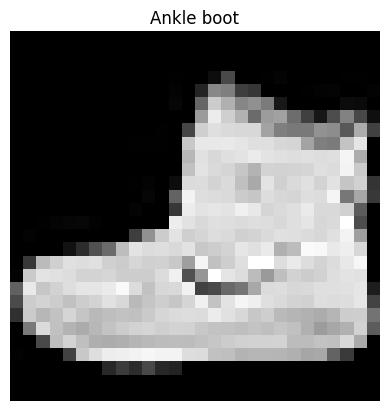

In [ ]:
image, label = train_data[0]
print(f"Image shape: {image.shape} -> (cc, H, W)")
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis("off");

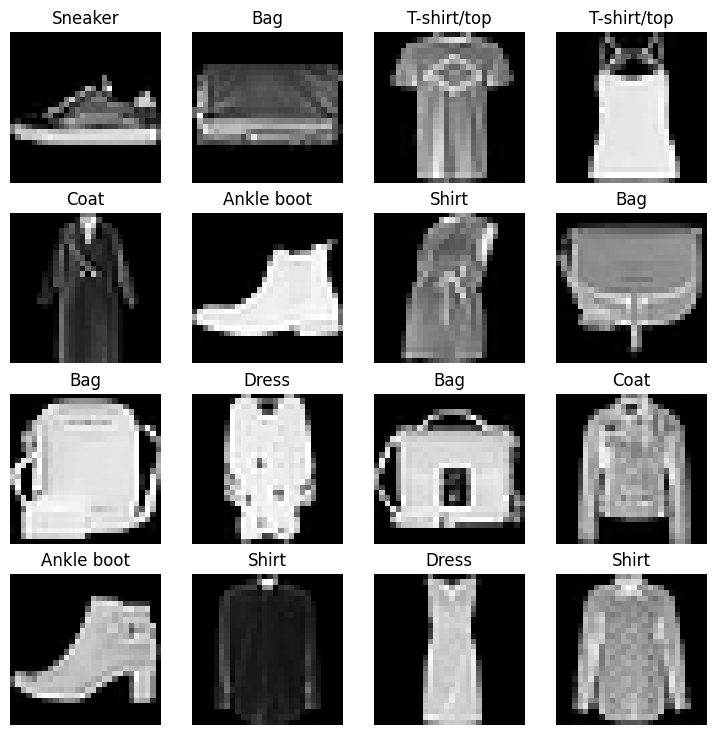

In [ ]:
# plot more images
#torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4, 4
for i in range(1, rows*cols+1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(class_names[label])
  plt.axis(False)

##2.Preapare DataLoader

In [ ]:
from torch.utils.data import DataLoader

#Setup the batch size hyperparameter
BATCH_SIZE = 32

# Turn datasets into interables(batches)
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7a871e5bced0>,
 <torch.utils.data.dataloader.DataLoader at 0x7a872c12b390>)

In [ ]:
train_dataloader.batch_sampler, train_dataloader.batch_size, train_dataloader.dataset

(<torch.utils.data.sampler.BatchSampler at 0x7a872dfac350>,
 32,
 Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor())

In [ ]:
# Let's check out what we've created
print(f"DaraLoaders: {train_dataloader, test_dataloader}")
print(f"Lenth of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Lenth of test dataloader: {len(test_dataloader)} batch size of {BATCH_SIZE}")

DaraLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x7a871e5bced0>, <torch.utils.data.dataloader.DataLoader object at 0x7a872c12b390>)
Lenth of train dataloader: 1875 batches of 32
Lenth of test dataloader: 313 batch size of 32


In [ ]:
# Check out what's inside the dataloader
train_features_batch , train_labels_batchs = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batchs.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 0, label size: torch.Size([])


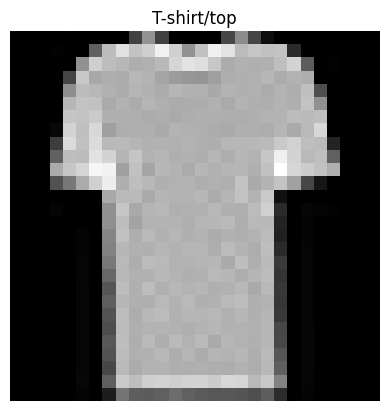

In [ ]:
# Show a sample in the batch
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batchs[random_idx]
plt.imshow(img.squeeze(), cmap = "gray")
plt.title(class_names[label])
plt.axis(False)
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")


##3.Create the first model




In [ ]:
class FashionMNISTModel_0(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape)
    )

  def forward(self, x):
    return self.layer_stack(x)


In [ ]:
torch.manual_seed(42)

# Setup model with input parameters
model_0 = FashionMNISTModel_0(
    input_shape=784, # this is 28 *28
    hidden_units=10, # how many units in the hidden layer
    output_shape=len(class_names) # one for every class
).to("cpu")

model_0

FashionMNISTModel_0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

###3.1 download helper_functions


In [ ]:
import requests
import pathlib
from pathlib import Path

if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skiping download...")

else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

###3.2 Setup loss func, optimizer and creat a timer


In [ ]:
from helper_functions import accuracy_fn

# Setup loss funtion and optmizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
lr=0.1)

In [ ]:
from timeit import default_timer as timer
def print_train_time(start: float,
                     end: float,
                     device: torch.device = None):

  total_time = end - start
  print(f"train time on {device}: {total_time:.3f} seconds")
  return total_time

###3.3 Creating a training loop and training a model on batches of data
1. Loop through epochs
2.Loop through training steps,perform training steps, calculate the train loss per batch
3.Loop through testin batches, perform testing steps, calculate the test loss per batch
4.Print out what's happening
5.Time it all

In [ ]:
from tqdm.auto import tqdm

# set the manual seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# Set the number os epochs
epochs = 3

# Create training and test loop
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-----")
  ###Training
  train_loss = 0
  # Add a loop to loop through the training batches
  for batch, (X, y) in enumerate(train_dataloader):
    model_0.train()
    #1. Forward pass
    y_pred = model_0(X)

    #2. Calculate loss per batch
    loss = loss_fn(y_pred, y)
    train_loss += loss # Accumulate train loss

    #3. Optimzer zero grad
    optimizer.zero_grad()

    #4. Loss backward
    loss.backward()

    #5. Optmizer step
    optimizer.step()

    # Print out what's happening
    if batch % 400 == 0:
      print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples.")
  # Divide total train loss by length of train dataloader
  train_loss /= len(train_dataloader)


  ### Testin
  test_loss, test_acc = 0, 0
  model_0.eval()
  with torch.inference_mode():
    for X_test, y_test in test_dataloader:
      #1. Foward pass
      test_pred = model_0(X_test)

      #2. Calculate loss
      test_loss += loss_fn(test_pred, y_test)

      #3. Calculate accuracy
      test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))

    # Calculate the test loss average per batch
    test_loss /= len(test_dataloader)

    # Calculate the test accuracy avarage per batch
    test_acc /= len(test_dataloader)

  # Print out what's happening
  print(f"\nTrain loss: {train_loss:.4f} | Test loss: {test_loss:.4f}, test acc: {test_acc:.4f}")
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                            end=train_time_end_on_cpu,
                                            device=str(next(model_0.parameters()).device))


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-----
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss: 0.5904 | Test loss: 0.5095, test acc: 82.0387
Epoch: 1
-----
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss: 0.4763 | Test loss: 0.4799, test acc: 83.1969
Epoch: 2
-----
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss: 0.4550 | Test loss: 0.4766, test acc: 83.4265
train time on cpu: 25.705 seconds


###3.4 Creating evaluation func

In [ ]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"

device

'cuda'

In [ ]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,):
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in tqdm(data_loader):
      # Make predictions
      y_pred = model(X)

      # Accumulate the loss and acc per batch
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true=y,
                         y_pred=y_pred.argmax(dim=1))
    loss /= len(data_loader)
    acc /= len(data_loader)
  return {"model_name": model.__class__.__name__, # only works whenmodel was created with a class
          "model_loss": loss.item(),
          "model_acc": acc}

# Calculate model 0 results on the test dataset
model_0_results = eval_model(model=model_0,
                            data_loader=test_dataloader,
                            loss_fn=loss_fn,
                            accuracy_fn=accuracy_fn)
model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModel_0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

##4.Creat a non-linear model to see if model improves


###4.0 Creat the model

In [ ]:
# Creat a model with non-linear layers
class FashionMNISTModel_1(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape),
        nn.ReLU()
    )

  def forward(self, x: torch.Tensor):
    return self.layer_stack(x)


In [ ]:
# Creat an instance of the model
torch.manual_seed(42)
model_1 = FashionMNISTModel_1(input_shape=784, # this is the output of the flatten after our 28*28 image goes in
                              hidden_units=10,
                              output_shape=len(class_names)).to(device) #send o=to gpu if is available

next(model_1.parameters()).device

device(type='cuda', index=0)

###4.1 Loss func and optimizer

In [ ]:
loss_fn = nn.CrossEntropyLoss() # Measure how wrong the model is
optimizer = torch.optim.SGD(params=model_1.parameters(), # tries to update the model
                            lr=0.1)


###4.2 Training and testing loop (Functionalized)

In [ ]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):


  train_loss, train_acc = 0, 0
  model.train()

  # Add a loop to loop through the training batches
  for batch, (X, y) in enumerate(data_loader):
    #Put model in targeted device
    X,y = X.to(device), y.to(device)

    #1. Forward pass
    y_pred = model(X)

    #2. Calculate loss and acc per batch
    loss = loss_fn(y_pred, y)
    train_loss += loss # Accumulate train loss
    train_acc += accuracy_fn(y_true=y,
                              y_pred=y_pred.argmax(dim=1))

    #3. Optimzer zero grad
    optimizer.zero_grad()

    #4. Loss backward
    loss.backward()

    #5. Optmizer step
    optimizer.step()


  # Divide total train loss by length of train dataloader
  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print(f"Train loss: {train_loss:.5f} | Train acc: {train_acc:.2f}%")

def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):

  ### Testin
  test_loss, test_acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in data_loader:
      # Put model to target device
      X, y = X.to(device), y.to(device)

      #1. Foward pass (outputs raw logits)
      test_pred = model(X)

      #2. Calculate loss
      test_loss += loss_fn(test_pred, y)

      #3. Calculate accuracy
      test_acc += accuracy_fn(y_true=y,
                              y_pred=test_pred.argmax(dim=1)) # go from logits -> pred probs

    # Calculate the test loss and acc average per batch
    test_loss /= len(data_loader)
    test_acc /= len(data_loader)

  # Print out what's happening
  print(f"Test loss: {test_loss:.4f}, test acc: {test_acc:.4f}")


###4.3 Train and test model

In [ ]:
# set the manual seed and start the timer
torch.manual_seed(42)
train_time_start_on_gpu = timer()

# Set the number os epochs
epochs = 3

# Create training and test loop
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-----")

  # Call training func
  train_step(model=model_1,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)

  # Call testing func
  test_step(model=model_1,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)

train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
                                            end=train_time_end_on_gpu,
                                            device=str(next(model_1.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-----
Train loss: 1.09199 | Train acc: 61.34%
Test loss: 0.9564, test acc: 64.9960
Epoch: 1
-----
Train loss: 0.78101 | Train acc: 71.93%
Test loss: 0.7223, test acc: 73.9117
Epoch: 2
-----
Train loss: 0.67027 | Train acc: 75.94%
Test loss: 0.6850, test acc: 75.0200
train time on cuda:0: 29.314 seconds


In [ ]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device: torch.device = device):
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in tqdm(data_loader):
      # Setup device agnostic code
      X, y = X.to(device), y.to(device)
      # Make predictions
      y_pred = model(X)

      # Accumulate the loss and acc per batch
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true=y,
                         y_pred=y_pred.argmax(dim=1))
    loss /= len(data_loader)
    acc /= len(data_loader)
  return {"model_name": model.__class__.__name__, # only works whenmodel was created with a class
          "model_loss": loss.item(),
          "model_acc": acc}


In [ ]:
model_1_results = eval_model(model=model_1,
                             data_loader=test_dataloader,
                             accuracy_fn=accuracy_fn,
                             loss_fn=loss_fn,
                             device=device)

model_1_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModel_1',
 'model_loss': 0.6850008964538574,
 'model_acc': 75.01996805111821}

##5.Create a convolutional model

###5.0 Create CNN


In [ ]:
# Create a convolutional neural network
class FashionMNISTModel_2(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1), # Hyperparameters: Values that we can set in the NN's
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
        )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7,
                  out_features=output_shape)
    )

  def forward(self, x):
    x = self.conv_block_1(x)
    #print(x.shape)
    x = self.conv_block_2(x)
    #print(x.shape)
    x = self.classifier(x)
    return x


In [ ]:
torch.manual_seed(42)
model_2 = FashionMNISTModel_2(input_shape=1,
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)

In [ ]:
model_2(image.unsqueeze(0).to(device))


tensor([[ 0.0246, -0.0644,  0.0551, -0.0360, -0.0139,  0.0113, -0.0014, -0.0075,
          0.0213,  0.0076]], device='cuda:0', grad_fn=<AddmmBackward0>)

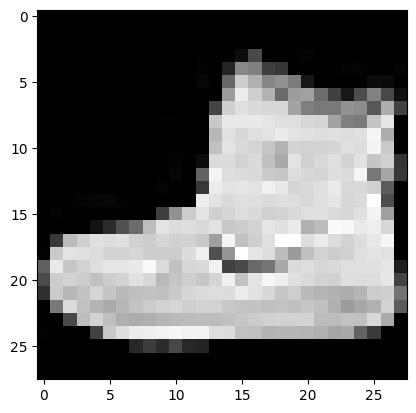

In [ ]:
plt.imshow(image.squeeze(), cmap= "gray")

###5.1 Setup loss func and optim

In [ ]:
#Setup loss function
loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.01)

###5.2 Training and test loop

In [ ]:
#setup manual seed and strat timer
torch.manual_seed(42)
train_time_start_on_gpu = timer()

#Define number of epochs
epochs = 3

# Start looping through epochs
for epoch in tqdm(range(epochs)):
  print(f"Epoch {epoch}\n--------")
  # Call train function
  train_step(model=model_2,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)

  # Call test function
  test_step(model=model_2,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)

train_time_end_on_gpu = timer()
total_train_time_model_2 = print_train_time(start=train_time_start_on_gpu,
                                            end=train_time_end_on_gpu,
                                            device=device)



  0%|          | 0/3 [00:00<?, ?it/s]

Epoch 0
--------
Train loss: 0.41363 | Train acc: 85.01%
Test loss: 0.4101, test acc: 85.6030
Epoch 1
--------
Train loss: 0.38717 | Train acc: 86.08%
Test loss: 0.3996, test acc: 85.8626
Epoch 2
--------
Train loss: 0.36806 | Train acc: 86.67%
Test loss: 0.3777, test acc: 86.6214
train time on cuda: 34.748 seconds


###5.3 Evaluating model

In [ ]:
model_2_results = eval_model(model=model_2,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn,
                             device=device)

  0%|          | 0/313 [00:00<?, ?it/s]

##6 Comparing models


In [ ]:
import pandas as pd

# Compare models
compare_models = pd.DataFrame([model_0_results,
                               model_1_results,
                               model_2_results])
compare_models

,model_name,model_loss,model_acc
0,FashionMNISTModel_0,0.476639,83.426518
1,FashionMNISTModel_1,0.685001,75.019968
2,FashionMNISTModel_2,0.377684,86.621406


In [ ]:
compare_models["Train time"] = [total_train_time_model_0,
                                total_train_time_model_1,
                                total_train_time_model_2]

compare_models

,model_name,model_loss,model_acc,Train time
0,FashionMNISTModel_0,0.476639,83.426518,25.705063
1,FashionMNISTModel_1,0.685001,75.019968,29.314310
2,FashionMNISTModel_2,0.377684,86.621406,34.747629


###6.1 Visulize comparison

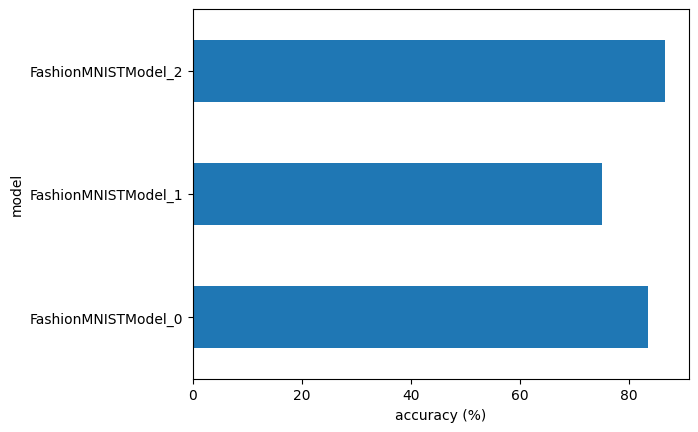

In [ ]:
compare_models.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy (%)")
plt.ylabel("model");

###6.2 Make and evaluate random predictions with best model

In [ ]:
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: device = device):
  pred_probs = []
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      # Prepare the sample (add a batch dimension and pass tp target device)
      sample = torch.unsqueeze(sample, dim=0).to(device)

      # Forward pass (model outputs raw logits)
      pred_logits = model(sample)

      # Getpredictions probability (logit->predictions probability)
      pred_prob = torch.softmax(pred_logits.squeeze(), dim=0)

      # Get pred_prob off the gpu for further calculation
      pred_probs.append(pred_prob.cpu())

  # Stack the pred_probs to turn list into a tensor
  return torch.stack(pred_probs)

Text(0.5, 1.0, 'Coat')

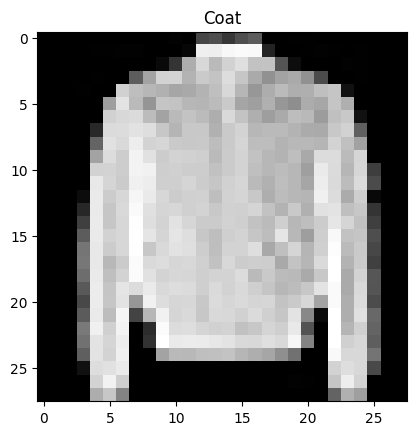

In [ ]:
plt.imshow(test_sample[0].squeeze(), cmap = "gray")
plt.title(class_names[test_labels[0]])

In [ ]:
# Make predictions
pred_probs = make_predictions(model=model_2,
                             data=test_sample)

# View the first two predictions probabilities
pred_probs[:2]

tensor([[6.4650e-05, 8.3040e-06, 2.4159e-02, 2.4130e-06, 9.2276e-01, 5.0428e-08,
         5.2805e-02, 4.7230e-10, 2.0040e-04, 9.7469e-08],
        [1.7458e-05, 1.1960e-07, 2.2925e-06, 4.4500e-06, 2.9735e-07, 4.7199e-03,
         1.2366e-05, 9.7399e-01, 3.3161e-03, 1.7937e-02]])

In [ ]:
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([4, 7, 4, 5, 5, 5, 5, 6, 9])

###6.3 Plot predictions

In [ ]:
import random

test_sample = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
  test_sample.append(sample)
  test_labels.append(label)

# View the first sample shape
test_sample[0].shape

torch.Size([1, 28, 28])

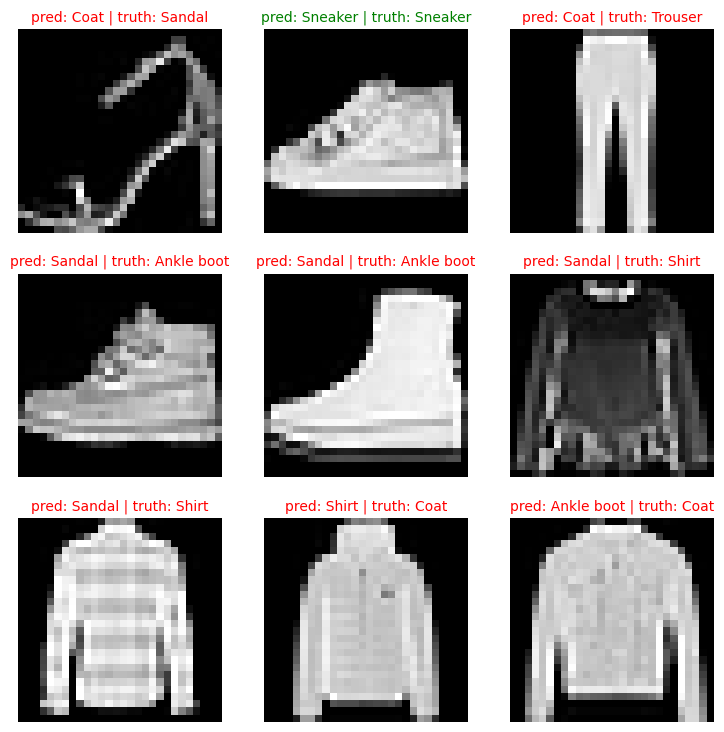

In [ ]:
# Plot results
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_sample):
  # Create subplot
  plt.subplot(nrows, ncols, i+1)

  # Plot the target image
  plt.imshow(sample.squeeze(), cmap="gray")

  #find the predictions (in text form)
  pred_label = class_names[pred_classes[i]]

  # Get the truth label (in the text form)
  truth_label = class_names[test_labels[i]]

  # Create a title for the plot
  title_text = f"pred: {pred_label} | truth: {truth_label}"

  # Check for equality between pred and truth and change color of title
  if pred_label == truth_label:
    plt.title(title_text, fontsize=10, c="g")
  else:
    plt.title(title_text, fontsize=10, c="r")
  plt.axis(False)

In [ ]:
model_2_results

{'model_name': 'FashionMNISTModel_2',
 'model_loss': 0.37768423557281494,
 'model_acc': 86.62140575079871}

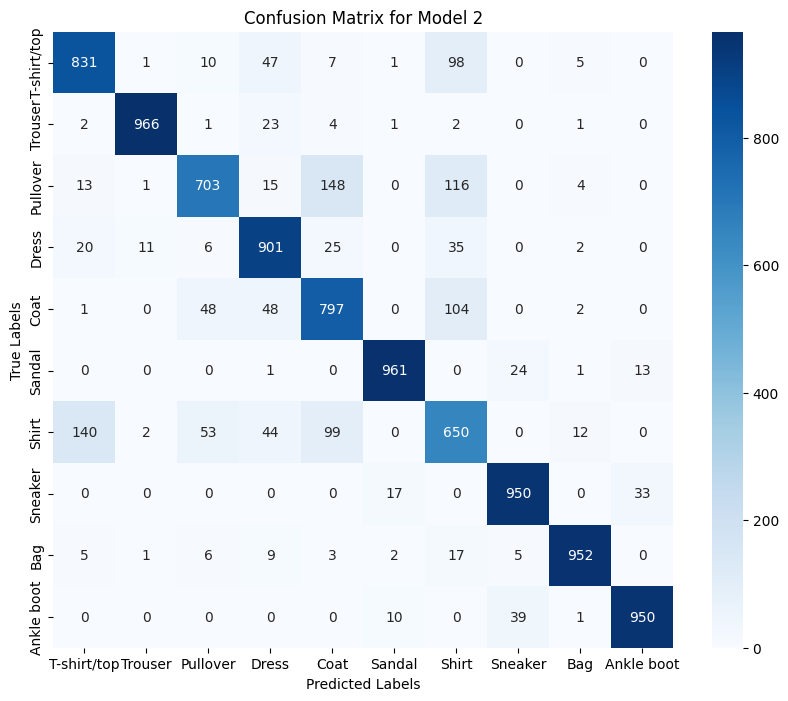

In [ ]:
# prompt: creat a confusion matrix with model_2

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming you have y_true (true labels) and y_pred (predicted labels)
# Replace these with your actual values

y_true = []  # Replace with your true labels
y_pred = [] # Replace with your model predictions

# Example using model_2 (replace with your actual prediction method)
with torch.no_grad():
    for X, y in test_dataloader:
      X, y = X.to(device), y.to(device)
      y_pred_logits = model_2(X)
      y_pred_batch = torch.argmax(y_pred_logits, dim=1)
      y_true.extend(y.cpu().numpy()) # move to cpu and convert to numpy
      y_pred.extend(y_pred_batch.cpu().numpy()) # move to cpu and convert to numpy


cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Model 2')
plt.show()


##7. Saving and loading best performing model

In [ ]:
from pathlib import Path

# Create model dictory path
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,
                 exist_ok=True)

# Create model save
MODEL_NAME = "03_PyTorch_computer_vision_model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

MODEL_SAVE_PATH

# Save model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(),
           f=MODEL_SAVE_PATH)


Saving model to: models/03_PyTorch_computer_vision_model_2.pth


In [ ]:
# Creat a new instance
torch.manual_seed(42)

loaded_model_2 = FashionMNISTModel_2(input_shape=1,
                                     hidden_units=10,
                                     output_shape=len(class_names))



# Loaded in the save state_dict()
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# Send the model to the target device
loaded_model_2.to(device)


FashionMNISTModel_2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [ ]:
model_2_results

{'model_name': 'FashionMNISTModel_2',
 'model_loss': 0.37768423557281494,
 'model_acc': 86.62140575079871}

In [ ]:
# Evaluate loaded model
torch.manual_seed(42)

loaded_model_2_results = eval_model(
    model=loaded_model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)

loaded_model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModel_2',
 'model_loss': 0.37768423557281494,
 'model_acc': 86.62140575079871}

In [ ]:
# Check if model results are close to each other
torch.isclose(torch.tensor(model_2_results["model_loss"]),
              torch.tensor(loaded_model_2_results["model_loss"])
              )

tensor(True)